dataset: https://www.kaggle.com/c/fake-news/data

In [1]:
import pandas as pd
import numpy as np
import nltk

In [2]:
df=pd.read_csv('train.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20800 entries, 0 to 20799
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      20800 non-null  int64 
 1   title   20242 non-null  object
 2   author  18843 non-null  object
 3   text    20761 non-null  object
 4   label   20800 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 812.6+ KB


In [4]:
df[0:10]

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1
5,5,Jackie Mason: Hollywood Would Love Trump if He...,Daniel Nussbaum,"In these trying times, Jackie Mason is the Voi...",0
6,6,Life: Life Of Luxury: Elton John’s 6 Favorite ...,NaN,Ever wonder how Britain’s most iconic pop pian...,1
7,7,Benoît Hamon Wins French Socialist Party’s Pre...,Alissa J. Rubin,"PARIS — France chose an idealistic, traditi...",0
8,8,Excerpts From a Draft Script for Donald Trump’...,NaN,Donald J. Trump is scheduled to make a highly ...,0
9,9,"A Back-Channel Plan for Ukraine and Russia, Co...",Megan Twohey and Scott Shane,A week before Michael T. Flynn resigned as nat...,0


In [5]:
df.dropna(inplace=True)
df.reset_index(drop=True, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18285 entries, 0 to 18284
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      18285 non-null  int64 
 1   title   18285 non-null  object
 2   author  18285 non-null  object
 3   text    18285 non-null  object
 4   label   18285 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 714.4+ KB


In [6]:
df[0:10]

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1
5,5,Jackie Mason: Hollywood Would Love Trump if He...,Daniel Nussbaum,"In these trying times, Jackie Mason is the Voi...",0
6,7,Benoît Hamon Wins French Socialist Party’s Pre...,Alissa J. Rubin,"PARIS — France chose an idealistic, traditi...",0
7,9,"A Back-Channel Plan for Ukraine and Russia, Co...",Megan Twohey and Scott Shane,A week before Michael T. Flynn resigned as nat...,0
8,10,Obama’s Organizing for Action Partners with So...,Aaron Klein,"Organizing for Action, the activist group that...",0
9,11,"BBC Comedy Sketch ""Real Housewives of ISIS"" Ca...",Chris Tomlinson,The BBC produced spoof on the “Real Housewives...,0


In [7]:
X=np.array(df['text'])

In [8]:
y=np.array(df['label'])

In [9]:
X.shape,y.shape

((18285,), (18285,))

In [10]:
X[0],y[0]

('House Dem Aide: We Didn’t Even See Comey’s Letter Until Jason Chaffetz Tweeted It By Darrell Lucus on October 30, 2016 Subscribe Jason Chaffetz on the stump in American Fork, Utah ( image courtesy Michael Jolley, available under a Creative Commons-BY license) \nWith apologies to Keith Olbermann, there is no doubt who the Worst Person in The World is this week–FBI Director James Comey. But according to a House Democratic aide, it looks like we also know who the second-worst person is as well. It turns out that when Comey sent his now-infamous letter announcing that the FBI was looking into emails that may be related to Hillary Clinton’s email server, the ranking Democrats on the relevant committees didn’t hear about it from Comey. They found out via a tweet from one of the Republican committee chairmen. \nAs we now know, Comey notified the Republican chairmen and Democratic ranking members of the House Intelligence, Judiciary, and Oversight committees that his agency was reviewing ema

In [11]:
import re
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

In [12]:
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [13]:
stop_words=stopwords.words('english')

In [14]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [15]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [16]:
corpus=[]
for para_i in X:
  temp=[]
  sentences=nltk.sent_tokenize(para_i)
  for sent_j in sentences:
    sent=re.sub('[^a-zA-Z]',' ',sent_j)
    sent=sent.lower()
    words=sent.split()
    words=[WordNetLemmatizer().lemmatize(word) for word in words if word not in stop_words]
    temp.extend(words)
  corpus.append(temp)

In [17]:
len(corpus[0])

433

In [18]:
import gensim

In [19]:
embedding_dim=150
w2v_model=gensim.models.Word2Vec(sentences=corpus,size=embedding_dim,window=6,min_count=1)

In [20]:
len(w2v_model.wv.vocab)

129246

In [21]:
w2v_model.wv.most_similar('republican')

[('gop', 0.7472599148750305),
 ('democrat', 0.7390846014022827),
 ('democratic', 0.691048264503479),
 ('delegate', 0.6114796996116638),
 ('bipartisan', 0.6091510653495789),
 ('senate', 0.5864129662513733),
 ('conservative', 0.5797840356826782),
 ('senator', 0.5761557817459106),
 ('candidacy', 0.5691183805465698),
 ('filibuster', 0.5639297962188721)]

In [22]:
w2v_model.wv.most_similar('facebook')

[('instagram', 0.6893184185028076),
 ('user', 0.6698392629623413),
 ('snapchat', 0.659115195274353),
 ('posting', 0.6406571865081787),
 ('online', 0.6116342544555664),
 ('google', 0.6058374047279358),
 ('reddit', 0.5968680381774902),
 ('weibo', 0.5855894088745117),
 ('website', 0.5807560682296753),
 ('twitter', 0.5803495049476624)]

In [23]:
from tensorflow.keras.preprocessing.text import Tokenizer
tokenizer = Tokenizer()
tokenizer.fit_on_texts(corpus)

X = tokenizer.texts_to_sequences(corpus)

In [24]:
word_index = tokenizer.word_index
for word, num in word_index.items():
    print(f"{word} -> {num}")
    if num == 10:
        break  

said -> 1
mr -> 2
trump -> 3
one -> 4
state -> 5
would -> 6
people -> 7
year -> 8
u -> 9
time -> 10


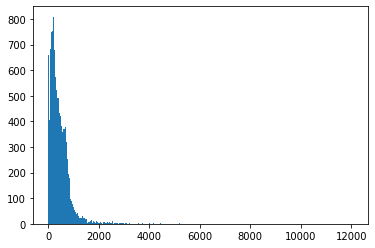

In [25]:
import matplotlib.pyplot as plt
plt.hist([len(x) for x in X], bins=500)
plt.show()

In [26]:
nos = np.array([len(x) for x in X])
len(nos[nos  < 500])

12100

In [27]:
len(X)

18285

In [28]:
import tensorflow 
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [29]:
max_length=500
X=pad_sequences(X,maxlen=max_length,padding='post')

In [31]:
vocab_size = len(word_index) + 1
weight_matrix = np.zeros((vocab_size, embedding_dim))
for word, i in word_index.items():
        weight_matrix[i] = w2v_model[word]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  after removing the cwd from sys.path.


In [32]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25)

In [33]:
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [34]:
tensorflow.keras.backend.clear_session()

In [35]:
model=Sequential()
model.add(layers.Embedding(vocab_size,output_dim=embedding_dim,weights=[weight_matrix],input_length=max_length,trainable=False,name='embedding'))
model.add(layers.Dropout(0.3))
model.add(layers.LSTM(128))
model.add(layers.Dropout(0.3))
model.add(layers.Dense(1,activation='sigmoid'))

In [36]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 500, 150)          19387050  
_________________________________________________________________
dropout (Dropout)            (None, 500, 150)          0         
_________________________________________________________________
lstm (LSTM)                  (None, 128)               142848    
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense (Dense)                (None, 1)                 129       
Total params: 19,530,027
Trainable params: 142,977
Non-trainable params: 19,387,050
_________________________________________________________________


In [37]:
model.fit(X_train,y_train,epochs=10,batch_size=64)

Epoch 1/10
215/215 [==============================] - 11s 32ms/step - loss: 0.5436 - accuracy: 0.6940
Epoch 2/10
215/215 [==============================] - 7s 31ms/step - loss: 0.3923 - accuracy: 0.8531
Epoch 3/10
215/215 [==============================] - 7s 31ms/step - loss: 0.3687 - accuracy: 0.8563
Epoch 4/10
215/215 [==============================] - 7s 31ms/step - loss: 0.3732 - accuracy: 0.8520
Epoch 5/10
215/215 [==============================] - 7s 31ms/step - loss: 0.3203 - accuracy: 0.8756
Epoch 6/10
215/215 [==============================] - 7s 31ms/step - loss: 0.2901 - accuracy: 0.9038
Epoch 7/10
215/215 [==============================] - 7s 31ms/step - loss: 0.1895 - accuracy: 0.9350
Epoch 8/10
215/215 [==============================] - 7s 31ms/step - loss: 0.1458 - accuracy: 0.9475
Epoch 9/10
215/215 [==============================] - 7s 31ms/step - loss: 0.1278 - accuracy: 0.9555
Epoch 10/10
215/215 [==============================] - 7s 31ms/step - loss: 0.1144 - accur

In [38]:
loss,accuracy=model.evaluate(X_test,y_test)
accuracy

143/143 [==============================] - 2s 12ms/step - loss: 0.1344 - accuracy: 0.9563


0.9562554955482483

In [39]:
y_pred=model.predict(X_test)

In [40]:
y_pred=[np.round(i) for i in y_pred]

In [41]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm=confusion_matrix(y_test,y_pred)
acc=accuracy_score(y_test,y_pred)
print(cm)
print(acc)

[[2501  117]
 [  83 1871]]
0.9562554680664916
